<a href="https://colab.research.google.com/github/olivierguy456/PUC/blob/main/Test2_ChristianMata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import skimage as sk # load skimage libraries

Mounted at /content/drive


In [ ]:
import skimage as sk
import matplotlib.pyplot as plt
from skimage import io
import os
from matplotlib import gridspec

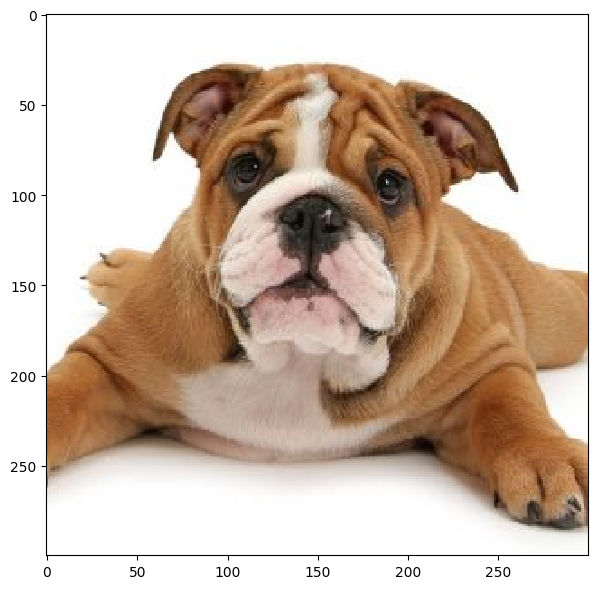

In [8]:
I1 = sk.io.imread( '/content/drive/MyDrive/imagespuc/dog_image.jpg')
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()

In [15]:
IG = sk.color.rgb2gray(I1)
IG.shape

(300, 300)

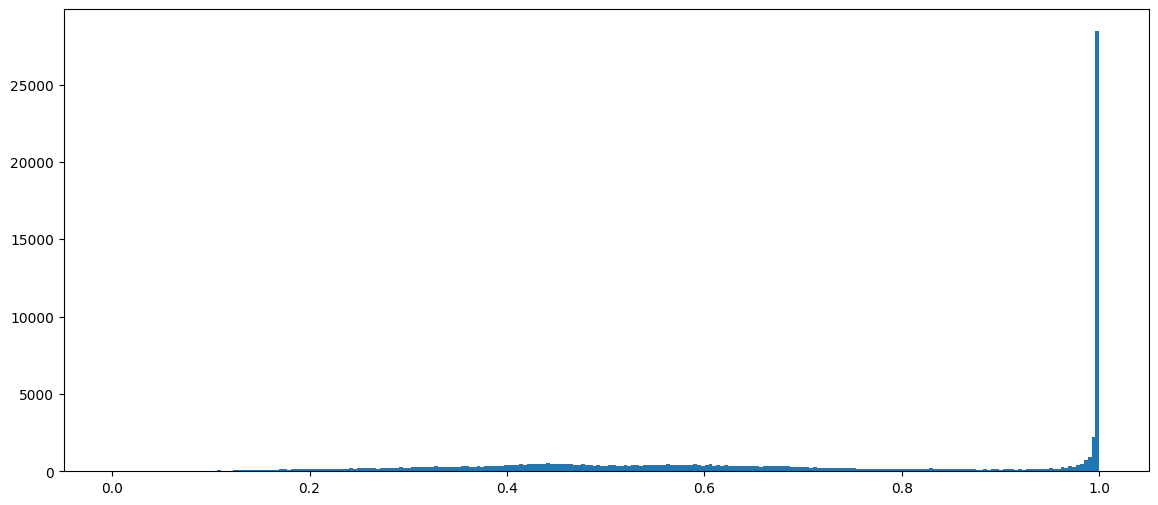

In [11]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

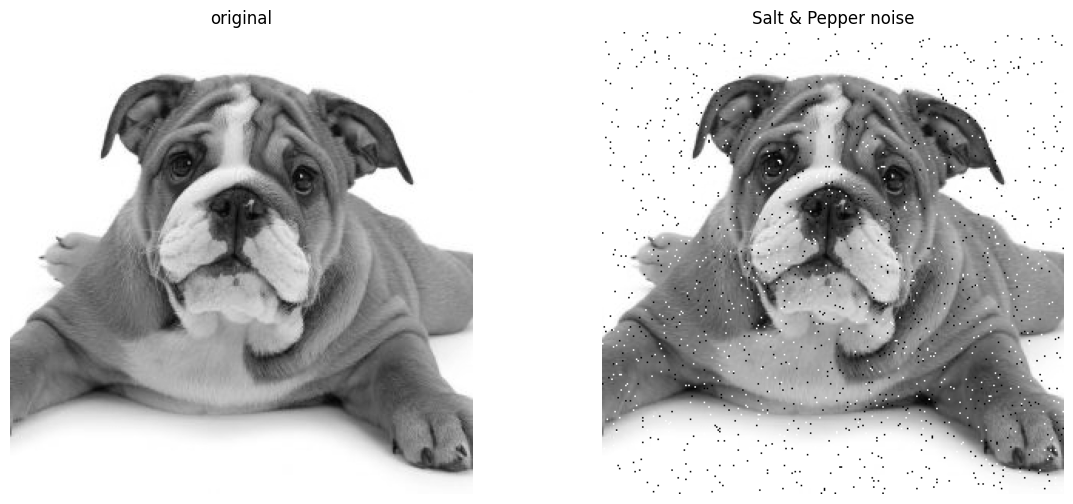

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte


## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(IG.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(IG,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

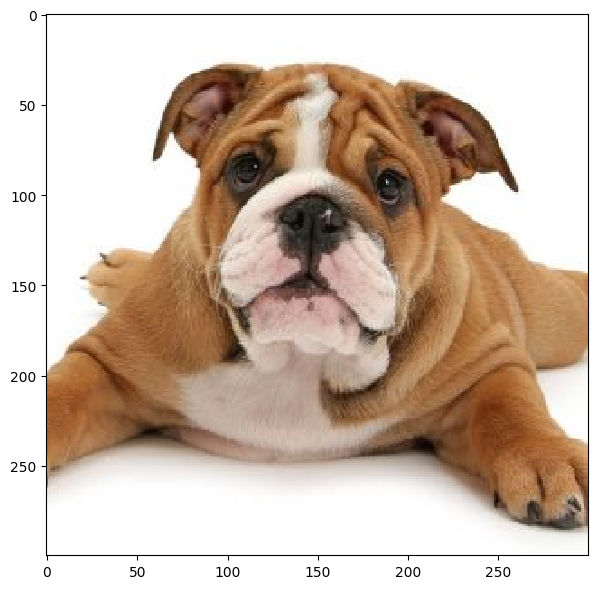

3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?